In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append(os.path.abspath('..'))

In [3]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from my_trainer.models import vit

In [8]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

torch.Size([1, 3, 64, 64])

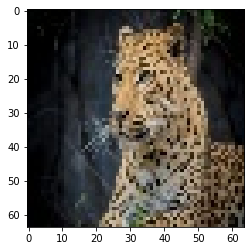

In [10]:
## input
img = cv2.imread('./images/animal_test_image_resize_64.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img_arr = torch.as_tensor(img, dtype=torch.float)
img_arr = img_arr.permute(2, 0, 1)
img_arr = img_arr.unsqueeze(0)

img_size = img_arr.shape[-1]
img_arr.shape

In [11]:
vit_net = vit.VisionTransformer(img_size=img_size)
preds = vit_net(img_arr)
preds.shape

INFO:root:number of samples -- 1
INFO:root:After patch embbedding -- torch.Size([1, 16, 768])
INFO:root:After cls token and pos embedding -- torch.Size([1, 17, 768])
INFO:root:After 12 attention blocks -- torch.Size([1, 17, 768])
INFO:root:Size of final class token -- torch.Size([1, 768])
INFO:root:After final head -- torch.Size([1, 1000])


torch.Size([1, 1000])